# Sprintの目的
- セグメンテーションの精度を向上させるスキルを身につける
- VGG、ResNetの構造を理解する(構造理解)
- 実務で扱う可能性のある物体検出のスキルを身につける

# どのように学ぶか
- 指定されたノートブックで、コードリーディングする→問題１

(前回使用した実装との違い→Sprint19終わってないのでここは様子見ながら)

(転移学習をどのように行っているか)
- 指定されたノートブックで、書き換えに対応する→問題２
- 書き換えたもので学習や推定を行う→問題３

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# 問題１コードレビュー

転移学習を使用してセグメンテーションの精度を改善したコードを提示するので、レビューを行って下さい。

《視点例》

- 前回使用した実装とはどのように違うのか
- 転移学習をどのように行っているか

## imagenetを用いて学習済みの重みを使い精度を上げている

# 問題２　コードの書き換え
エンコーダーにResNetが使用されていたコードを VGGに変更してください。

## Train model:を変更する

In [ ]:
#Base model - encoder
    base_model = ResNet50(
        input_shape=input_size, 
        include_top=False,
        weights=weights)    
    

    #Layers for feature extraction in the encoder part
    encoder1 = base_model.get_layer('activation_1').output
    encoder2 = base_model.get_layer('activation_10').output
    encoder3 = base_model.get_layer('activation_22').output
    encoder4 = base_model.get_layer('activation_40').output
    encoder5 = base_model.get_layer('activation_49').output

### 上記を下記に変更

In [ ]:
 base_model = VGG16(
        include_top=True, 
        weights='imagenet', 
        input_tensor=None, 
        input_shape=None)
  
  　　　encoder1 = base_model.get_layer('block1_pool').output
    encoder2 = base_model.get_layer('block2_pool').output
    encoder3 = base_model.get_layer('block3_pool').output
    encoder4 = base_model.get_layer('block4_pool').output
    encoder5 = base_model.get_layer('block5_pool').output    

# 問題３　学習・推定
ResNetとVGGのコードで学習・推定を行い、結果を比較してください。

In [ ]:
#別のノートに記載→ResNet用とVGG16用がある

## ResNet

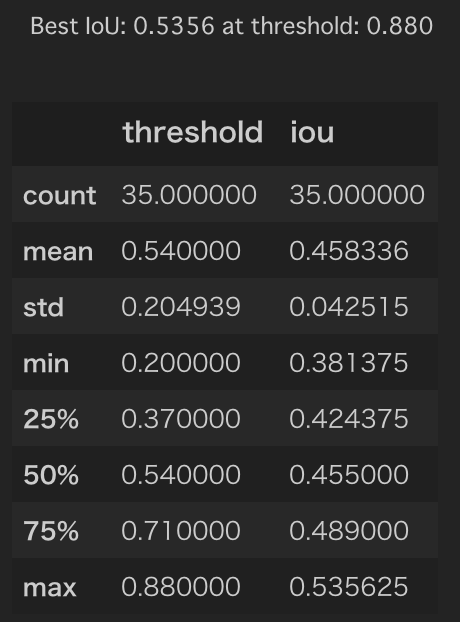

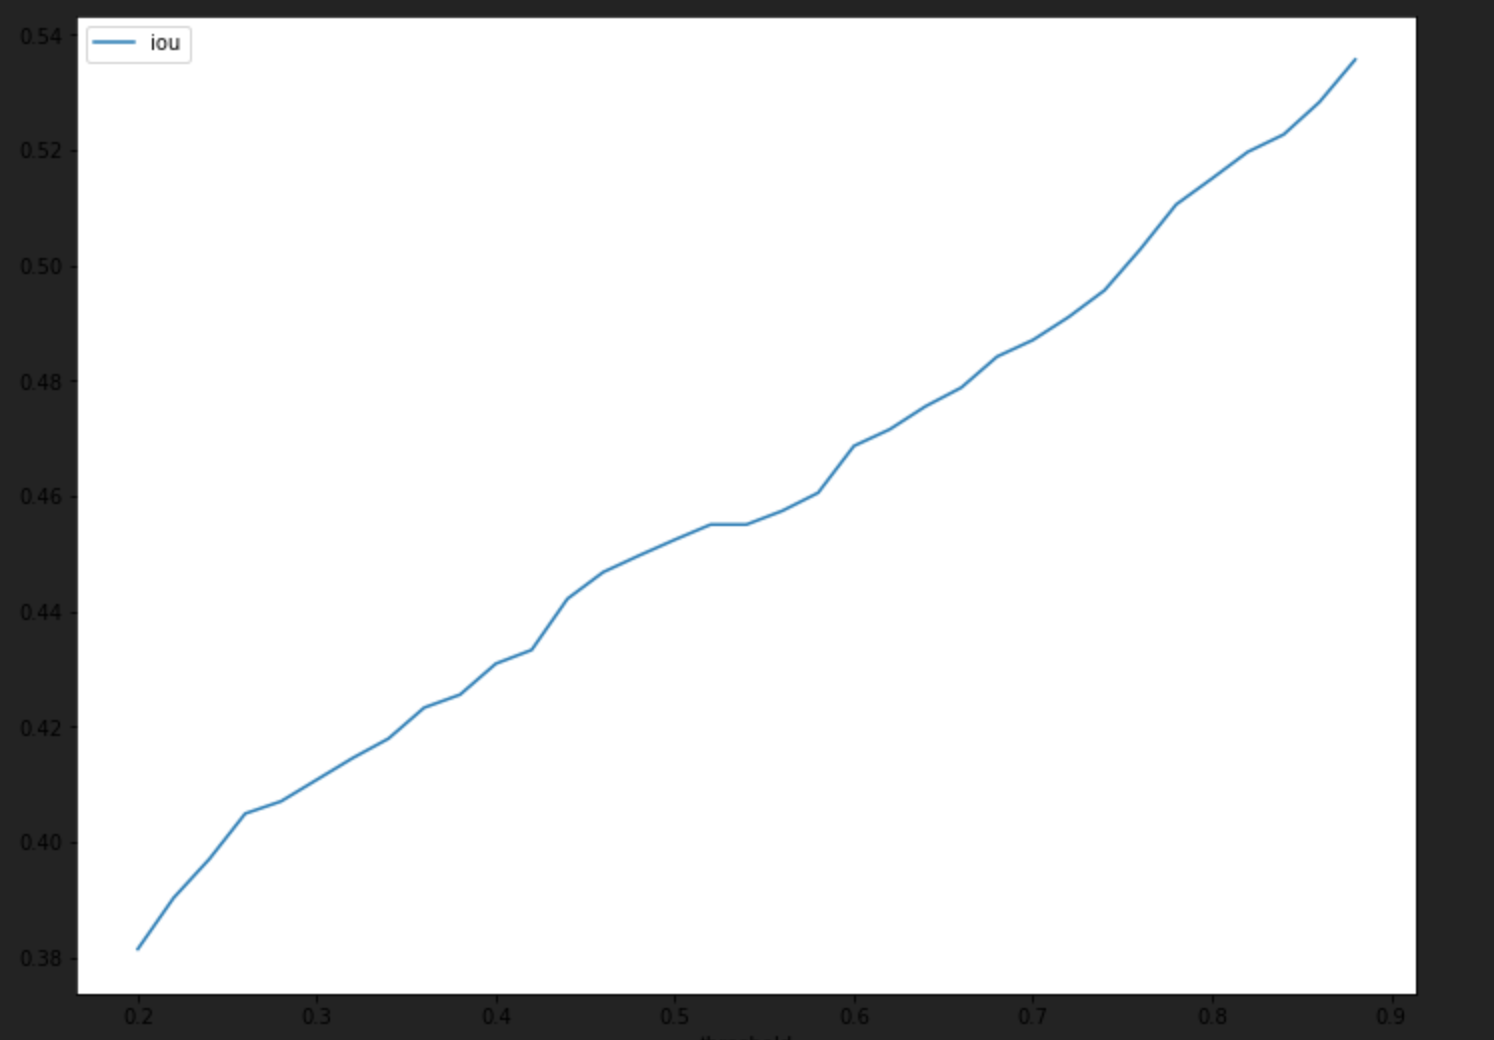

## VGG16

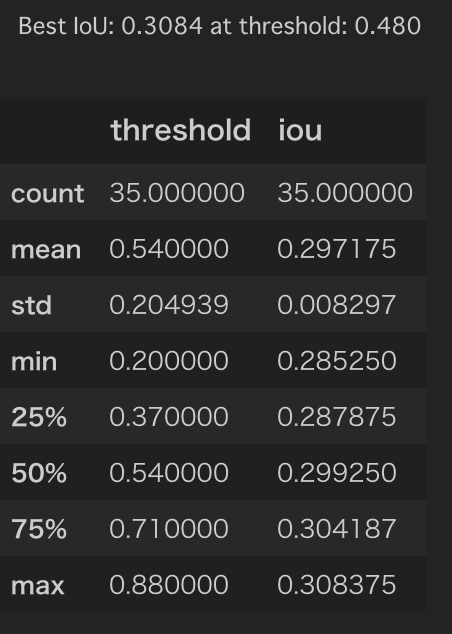

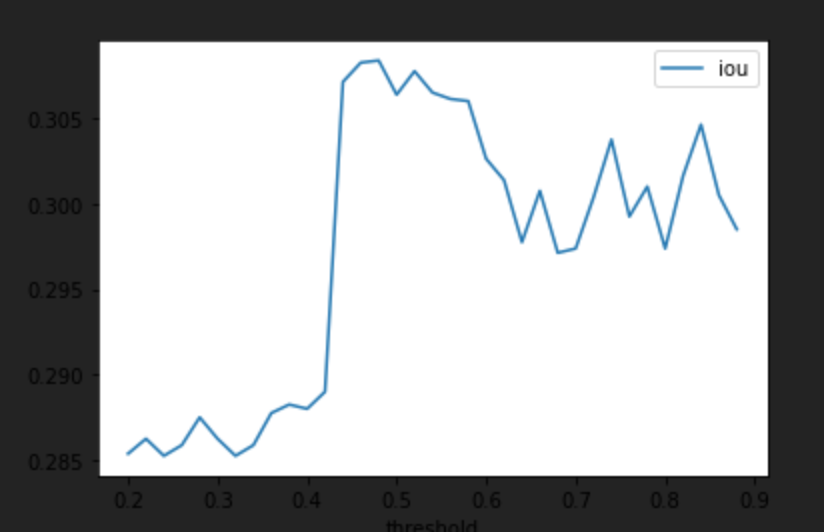

精度はResNet50の方が高く、また学習結果に対する予測も立てやすいことが分かる。VGG16は局所的に良い結果が出ることはあるかもしれないが、それでも最終的に回数を回していくとResNet50には劣ると思われる